In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#import keras as K
import keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow import expand_dims
#import tensorflow as tf
from google.cloud import storage
from google.colab.patches import cv2_imshow


In [ ]:
import json
so=[];

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import Model


In [ ]:
K=tf.keras.backend
act_model=load_model('/content/drive/MyDrive/FYP/LSTM/model3.h5',compile = False,custom_objects={"K.squeeze": tf.squeeze})
a=act_model.input[0]
b=act_model.get_layer('dense')
Model2=Model(inputs=a,outputs=b.output)


In [ ]:
#Model2.save(filepath='/content/drive/MyDrive/FYP/LSTM2/model3.h5', overwrite=False, include_optimizer=True)

In [ ]:
img3=None;

In [ ]:

def process_img(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    canny = cv2.Canny(blur, 120, 255, 1)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    dilate = cv2.dilate(canny, kernel, iterations=5)
    img_erode = cv2.erode(dilate, kernel, iterations=1)

#    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img_canny = cv2.Canny(img_gray, 120, 225,1)
    # kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    # img_dilate = cv2.dilate(img_canny, kernel, iterations=5)
    # img_erode = cv2.erode(img_dilate, kernel, iterations=1)
    return img_erode

In [ ]:


def get_centeroid(cnt):
    length = len(cnt)
    sum_x = np.sum(cnt[..., 0])
    sum_y = np.sum(cnt[..., 1])
    return int(sum_x / length), int(sum_y / length)
words_list = []
def get_centers(img):
    contours, hierarchies = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) > 100:
            x2, y2, w2, h2 = cv2.boundingRect(cnt)
            words_list.append([x2, y2, x2+w2, y2+h2])
            yield get_centeroid(cnt)



In [ ]:

def get_rows(img, centers, row_amt, row_h):
    centers = np.array(centers)
    d = row_h / row_amt
    for i in range(row_amt):
        f = centers[:, 1] - d * i
        a = centers[(f < d) & (f > 0)]
        yield a[a.argsort(0)[:, 0]]


In [ ]:
def process_image(img):
    """
    Converts image to shape (32, 128, 1) & normalize
    """
    print(img.shape)
    w, h = img.shape

#     _, img = cv2.threshold(img,
#                            128,
#                            255,
#                            cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Aspect Ratio Calculation
    new_w = 32
    new_h = int(h * (new_w / w))
    img = cv2.resize(img, (new_h, new_w))
    w, h = img.shape

    img = img.astype('float32')

    # Converts each to (32, 128, 1)
    if w < 32:
        add_zeros = np.full((32-w, h), 255)
        img = np.concatenate((img, add_zeros))
        w, h = img.shape

    if h < 128:
        add_zeros = np.full((w, 128-h), 255)
        img = np.concatenate((img, add_zeros), axis=1)
        w, h = img.shape

    if h > 128 or w > 32:
        dim = (128,32)
        img = cv2.resize(img, dim)

    img = cv2.subtract(255, img)

    img = np.expand_dims(img, axis=2)

    # Normalize
    img = img / 255

    return img

In [ ]:
def fun(img):
  img=process_image(img)
  img=expand_dims(img, axis=0)
  prediction = Model2.predict(img)
  decoded = K.ctc_decode(prediction,input_length=np.ones(prediction.shape[0]) * prediction.shape[1],greedy=True)[0][0]
  out = K.get_value(decoded)
  char_list = "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

  for i, x in enumerate(out):
      print("predicted text = ", end = '')
      for p in x:
          if int(p) != -1:
              s=char_list[int(p)]
              so.append(s)
              print(s)
      so.append(' ')



In [ ]:
act_model=load_model('/content/drive/MyDrive/FYP/LSTM/model3.h5',compile = False)
a=act_model.input[0]
b=act_model.get_layer('dense')
Model2=Model(inputs=a,outputs=b.output)


In [ ]:
import tensorflow as tf

In [ ]:
def segmentation( img ):

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  h, w, c = img.shape

  if w > 1000:

      new_w = 1000
      ar = w/h
      new_h = int(new_w/ar)

      img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
  img3=img.copy()
  print("Done")
  return img

#  plt.imshow(img);

In [ ]:
def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh, cmap='gray')
    return thresh



In [ ]:
def realPred(img):
  copy=img.copy()
  #img_processed = process_img(img)
  # centers = list(get_centers(img_processed))

  # h, w, c = img.shape
  # count = 0

  # for row in get_rows(img, centers, 10, h):
  #     cv2.polylines(img, [row], False, (255, 0, 255), 2)
  #     for x, y in row:
  #         count += 1
  #         cv2.circle(img, (x, y), 10, (0, 0, 255), -1)
  #         cv2.putText(img, str(count), (x - 10, y + 5), 1, cv2.FONT_HERSHEY_PLAIN, (0, 255, 255), 2)

  # #cv2_imshow(img)
  # #cv2.waitKey(0)
  # copy = cv2.cvtColor(copy, cv2.COLOR_BGR2GRAY)


  # ninth_word = words_list[-1]
  # roi_9 = copy[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
  # #print(ninth_word)
  # #plt.imshow(roi_9);

  act_model=load_model('/content/drive/MyDrive/FYP/LSTM/model3.h5',compile = False,custom_objects={"K.squeeze": tf.squeeze})
  a=act_model.input[0]
  b=act_model.get_layer('dense')
  Model2=Model(inputs=a,outputs=b.output)
  # for x in reversed(range(len(words_list))):
  #   ninth_word = words_list[x]
  #   roi_9 = copy[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
  #   from google.colab.patches import cv2_imshow
  cv2_imshow(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  fun(img)

  str1=""
  for i in so:
      str1 += i
  print(str1)


Done


(23, 19)
predicted text = A
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A 


(22, 94)
predicted text = M
o
V
E
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE 


(23, 37)
predicted text = t
o
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to 


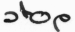

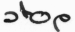

(32, 75)
predicted text = s
t
o
p
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop 


(27, 52)
predicted text = M
r
.
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. 


(7, 12)
predicted text = .
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . 


(29, 163)
predicted text = G
a
i
t
s
k
e
l
l
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell 


(31, 78)
predicted text = f
r
o
m
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from 


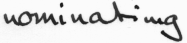

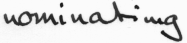

(43, 187)
predicted text = n
o
m
i
n
a
t
i
n
g
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating 


(8, 12)
predicted text = .
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . 


(8, 13)
predicted text = .
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . 


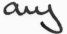

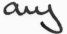

(34, 67)
predicted text = a
n
y
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any 


(20, 92)
predicted text = m
o
r
e
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more 


(27, 127)
predicted text = L
a
b
o
u
r
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour 


(28, 78)
predicted text = l
i
f
e
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life 


(31, 103)
predicted text = P
e
e
r
s
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers 


(16, 35)
predicted text = n
o
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no 


(8, 13)
predicted text = .
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . 


(24, 37)
predicted text = t
o
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to 


(29, 53)
predicted text = b
e
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be 


(21, 121)
predicted text = m
a
d
e
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made 


(26, 40)
predicted text = a
t
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at 


(17, 34)
predicted text = a
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a 


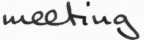

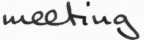

(40, 144)
predicted text = m
e
e
t
i
n
g
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting 


(8, 11)
predicted text = .
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . 


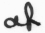

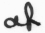

(33, 45)
predicted text = a
f
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af 


(29, 130)
predicted text = L
a
b
o
u
r
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour 


(23, 59)
predicted text = M
P
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 


(17, 24)
predicted text = 8
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 


(25, 193)
predicted text = t
o
m
o
r
r
o
w
.
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. 


(27, 67)
predicted text = M
r
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr 


(6, 12)
predicted text = .
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . 


(26, 139)
predicted text = M
i
c
h
a
e
l
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael 


(28, 84)
predicted text = F
o
o
t
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot 


(17, 60)
predicted text = s
a
s
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas 


(30, 70)
predicted text = p
u
t
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put 


(22, 97)
predicted text = d
o
w
n
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down 


(14, 31)
predicted text = a
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a 


(24, 181)
predicted text = v
e
s
o
l
u
t
i
o
n
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution 


(16, 39)
predicted text = o
n
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on 


(25, 75)
predicted text = t
h
e
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the 


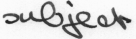

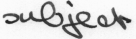

(39, 136)
predicted text = s
u
b
j
e
c
t
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject 


(8, 14)
predicted text = .
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . 


(7, 12)
predicted text = .
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . 


(23, 85)
predicted text = o
n
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on 


(20, 59)
predicted text = h
e
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he 


(5, 12)
predicted text = .
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . 


(14, 28)
predicted text = n
o
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . no 


(21, 41)
predicted text = t
o
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . no to 


(25, 64)
predicted text = b
e
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . no to be 


(22, 133)
predicted text = b
a
c
k
e
d
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . no to be backed 


(27, 48)
predicted text = b
y
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . no to be backed by 


(24, 57)
predicted text = M
r
.
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . no to be backed by Mr. 


(8, 13)
predicted text = .
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . no to be backed by Mr. . 


(25, 67)
predicted text = W
i
l
l
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . no to be backed by Mr. . Will 


(30, 150)
predicted text = G
r
i
f
f
i
t
h
s
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . no to be backed by Mr. . Will Griffiths 


(16, 15)
predicted text = ,
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . no to be backed by Mr. . Will Griffiths , 


(24, 33)
predicted text = "
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . no to be backed by Mr. . Will Griffiths , " 


(27, 39)
predicted text = P
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . no to be backed by Mr. . Will Griffiths , " P 


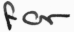

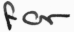

(32, 74)
predicted text = f
o
r
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . no to be backed by Mr. . Will Griffiths , " P for 


(25, 184)
predicted text = M
a
n
c
h
e
s
t
e
r
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . no to be backed by Mr. . Will Griffiths , " P for Manchester 


(28, 192)
predicted text = E
x
h
a
n
g
e
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . no to be backed by Mr. . Will Griffiths , " P for Manchester Exhange 


(9, 12)
predicted text = .
sor-ooD Sentence Database - - - - - A nore to stor Mrr. Gaitskellfioa nominatingaav #ore tabour Vfeleersis to bemadeat a neclingodlalows " Potomomom Mr. Michad oot has putdoma a resodlutionon the subject and he is to be backed br Mrr. mi Gviththsr " # for Mandatorlerdasgh - - - - " MovE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers o . to be made at a meeting . of Labour MP 8 tomorrow Mr . Michael Foot has put down a resolution on the subject " . on he . o to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . - - - - - Mraraer . A MoVE to stop Mr. . Gaitskell from nominating . . any more Labour life Peers no . to be made at a meeting . af Labour MP 8 tomorrow. Mr . Michael Foot sas put down a vesolution on the subject . . on he . no to be backed by Mr. . Will Griffiths , " P for Manchester Exhange . 


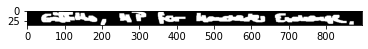

In [ ]:
#dilation
img = cv2.imread('/content/1.png')
img=segmentation(img)
img3=img.copy()
thresh_img = thresholding(img);
kernel = np.ones((3,85), np.uint8)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap='gray');
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (
img2 = img.copy()
for ctr in sorted_contours_lines:

    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)

#cv2_imshow(img2);
sorted_ctrs = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[1])
for j in range(0,len(sorted_ctrs)):
  x, y, w, h = cv2.boundingRect(sorted_ctrs[j])

  # Getting ROI
  roi = img3[y:y+h, x:x+w]

  # show ROI
  #cv2_imshow(roi)
  #cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
#dilation
for i in range(0,len(sorted_ctrs)):
  kernel = np.ones((5,10), np.uint8)
  x, y, w, h = cv2.boundingRect(sorted_ctrs[i])

    # Getting ROI
  roi = img3[y:y+h, x:x+w]
  #cv2_imshow(roi)
  thresh_img = thresholding(roi);

  dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
  plt.imshow(dilated2, cmap='gray');
  (contours2, heirarchy) = cv2.findContours(dilated2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  sorted_contours_lines_word = sorted(contours2, key = lambda ctr : cv2.boundingRect(ctr)[0]) # (x, y, w, h)
  for j in range(0,len(sorted_contours_lines_word)):
    x, y, w, h = cv2.boundingRect(sorted_contours_lines_word[j])

    # Getting ROI
    roi2 = roi[y:y+h, x:x+w]


    # show ROI
    #cv2_imshow(roi2)
    realPred(roi2)
    #cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)



In [ ]:
SK.__version__


AttributeError: ignored

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#import keras
import keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow import expand_dims
#import tensorflow as tf
from google.cloud import storage

SyntaxError: ignored

In [ ]:
K=tf.keras.backend

In [ ]:
import tensorflow as tf
tf.__version__


In [ ]:
import keras as K
K.__version__

'2.8.0'

In [ ]:
cv2.__version__

'4.1.2'

In [ ]:
!python --version

Python 3.7.13


In [ ]:
# Function dependencies, for example:
# package>=version

tensorflow==2.9.0
google-cloud-storage==1.16.1
Pillow==6.2.0
opencv-python==4.6.0.66
matplotlib==3.5.2
keras==2.9.0

array([], shape=(0, 0, 3), dtype=uint8)

In [ ]:
# Function dependencies, for example:
# package>=version

tensorflow==2.8.2
google-cloud-storage==1.16.1
Pillow==6.2.0
opencv-python==4.1.2
matplotlib==3.5.2
keras==2.8.0

In [ ]:
so=[]


In [ ]:
str(so)

"['A', ' ', 'M', 'o', 'v', 'E', ' ', 't', 'o', ' ', 's', 't', 'o', 'p', ' ', 'M', 'r', '.', ' ', 'G', 'G', 'i', 't', 's', 'h', 'e', 'l', 'l', ' ', 'f', 'r', 'o', 'm', ' ', 'l', 'i', 'f', 'e', ' ', 'n', 'o', 'm', 'i', 'n', 'a', 't', 'i', 'n', 'g', ' ', 'P', 'e', 'e', 'r', 's', ' ', 'L', 'a', 'b', 'o', 'u', 'r', ' ', 'a', 'n', 'y', ' ', 'm', 'o', 'r', 'e', ' ', 'i', 's', ' ', 'a', 'f', ' ', 'b', 'e', ' ', 'm', 'e', 'e', 't', 'i', 'n', 'g', ' ', 'a', 't', ' ', 't', 'o', ' ', 'L', 'a', 'b', 'o', 'u', 'r', ' ', 'm', 'a', 'd', 'e', ' ', 'a', ' ', 'M', 'P', 's', ' ', 'M', 'r', '.', ' ', 'F', 'o', 'o', 't', ' ', 't', 'o', 'm', 'o', 'r', 'r', 'o', 'w', ' ', 'M', 'i', 'c', 'h', 'a', 'e', 'l', ' ', 'h', 'a', 's', ' ', 's', 'u', 'b', 'j', 'e', 'c', 't', ' ', 'p', 'u', 't', ' ', 't', 'h', 'e', ' ', 'v', 'e', 's', 'o', 'u', 't', 'i', 'o', 'n', ' ', 'd', 'o', 'w', 'n', ' ', 'o', 'n', ' ', 'a', ' ', 'i', 'v', ' ', 'M', 'r', '.', ' ', 'w', 'i', 'l', 'l', ' ', 'h', 'e', ' ', 'b', 'a', 'c', 'h', 'e', 'd'

A MovE to stop Mr. GGitshell from life nominating Peers Labour any more is af be meeting at to Labour made a MPs Mr. Foot tomorrow Michael has subject put the vesoution down on a iv Mr. will he bached ond be do by MP Giffiths for Manchester Exdange- , 


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#import keras.backend as K
import tensorflow as tf
from google.cloud import storage

interpreter = None
input_index = None
output_index = None

model = None
words_list = []

BUCKET_NAME = "image2text-fyp" # Here you need to put the name of your GCP bucket
def download_blob(bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    storage_client = storage.Client()
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(source_blob_name)

    blob.download_to_filename(destination_file_name)

    print(f"Blob {source_blob_name} downloaded to {destination_file_name}.")


def process_img(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    canny = cv2.Canny(blur, 120, 255, 1)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    dilate = cv2.dilate(canny, kernel, iterations=5)
    img_erode = cv2.erode(dilate, kernel, iterations=1)

    #    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img_canny = cv2.Canny(img_gray, 120, 225,1)
    # kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    # img_dilate = cv2.dilate(img_canny, kernel, iterations=5)
    # img_erode = cv2.erode(img_dilate, kernel, iterations=1)
    return img_erode


def get_centeroid(cnt):
    length = len(cnt)
    sum_x = np.sum(cnt[..., 0])
    sum_y = np.sum(cnt[..., 1])
    return int(sum_x / length), int(sum_y / length)
def get_centers(img):
    contours, hierarchies = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) > 100:
            x2, y2, w2, h2 = cv2.boundingRect(cnt)
            words_list.append([x2, y2, x2+w2, y2+h2])
            yield get_centeroid(cnt)


def get_rows(img, centers, row_amt, row_h):
    centers = np.array(centers)
    d = row_h / row_amt
    for i in range(row_amt):
        f = centers[:, 1] - d * i
        a = centers[(f < d) & (f > 0)]
        yield a[a.argsort(0)[:, 0]]
def process_image(img):
    """
    Converts image to shape (32, 128, 1) & normalize
    """
    w, h = img.shape

    #     _, img = cv2.threshold(img,
    #                            128,
    #                            255,
    #                            cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        # Aspect Ratio Calculation
    new_w = 32
    new_h = int(h * (new_w / w))
    img = cv2.resize(img, (new_h, new_w))
    w, h = img.shape

    img = img.astype('float32')

    # Converts each to (32, 128, 1)
    if w < 32:
        add_zeros = np.full((32-w, h), 255)
        img = np.concatenate((img, add_zeros))
        w, h = img.shape

    if h < 128:
        add_zeros = np.full((w, 128-h), 255)
        img = np.concatenate((img, add_zeros), axis=1)
        w, h = img.shape

    if h > 128 or w > 32:
        dim = (128,32)
        img = cv2.resize(img, dim)

    img = cv2.subtract(255, img)

    img = np.expand_dims(img, axis=2)

    # Normalize
    img = img / 255

    return img
def fun(img):
  img=process_image(img)
  img=expand_dims(img, axis=0)
  prediction = Model2.predict(img)
  decoded = K.ctc_decode(prediction,
                                input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                                greedy=True)[0][0]
  out = K.get_value(decoded)
  char_list = "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

  for i, x in enumerate(out):
      #print("predicted text = ", end = '')
      for p in x:
          if int(p) != -1:
              s=char_list[int(p)]
              so.append(s)
              #print(s)
      so.append(' ')

def hello_world(request):
  global model
  if model is None:
      download_blob(BUCKET_NAME,"cloud-Storage/model3.h5","/tmp/potatoes.h5")
  img = request.files["file"]
  copy=img.copy()
  img_processed = process_img(img)
  centers = list(get_centers(img_processed))

  h, w, c = img.shape
  count = 0

  for row in get_rows(img, centers, 10, h):
      cv2.polylines(img, [row], False, (255, 0, 255), 2)
      for x, y in row:
          count += 1
          cv2.circle(img, (x, y), 10, (0, 0, 255), -1)
          cv2.putText(img, str(count), (x - 10, y + 5), 1, cv2.FONT_HERSHEY_PLAIN, (0, 255, 255), 2)
  #cv2_imshow(img)
  #cv2.waitKey(0)
  copy = cv2.cvtColor(copy, cv2.COLOR_BGR2GRAY)
  ninth_word = words_list[-1]
  roi_9 = copy[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
  #print(ninth_word)
  #plt.imshow(roi_9)
  act_model=model = tf.keras.models.load_model("/tmp/potatoes.h5",compile = False)
  #keras.models.load_model('/content/drive/MyDrive/FYP/LSTM/model3.h5',compile = False)
  a=act_model.input[0]
  b=act_model.get_layer('dense')
  Model2=Model(inputs=a,outputs=b.output)
  for x in reversed(range(len(words_list))):
    ninth_word = words_list[x]
    roi_9 = copy[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
    #cv2_imshow(roi_9)
    fun(roi_9)

  str1=""
  for i in so:
      str1 += i
  print(str1)
  return str1


In [ ]:
hello_world(None)

RefreshError: ignored